# Introduction

#### The basic knowledge of digital audio production is a must to get a hold of feature extraction and further audio processing. Below we discuss the Analog to Digital Conversion(ADC) process which is a fundamental process done on raw input(input to the mic) so as to store it digitally.


Consider, you are a guy who's singing 'Sicko Mode' by Travis Scott!


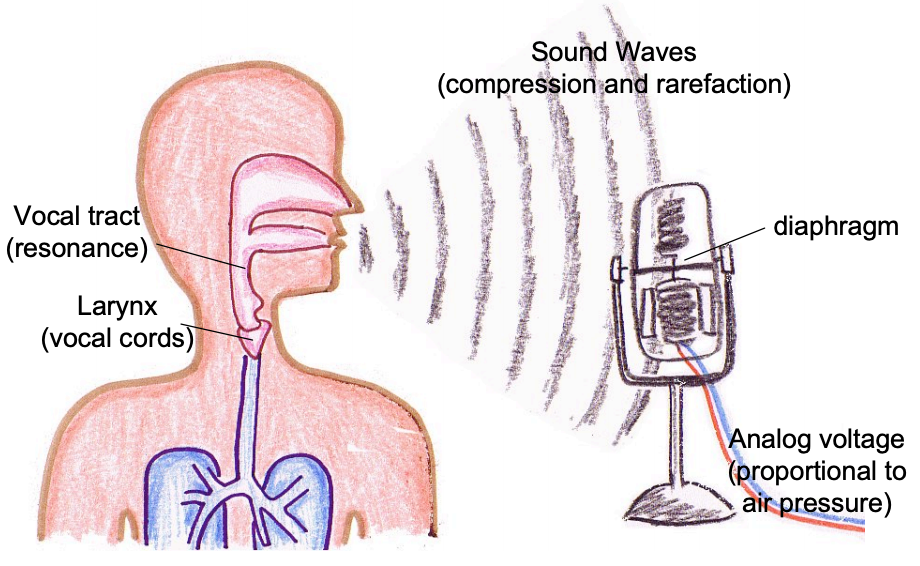

Travis, my man!!
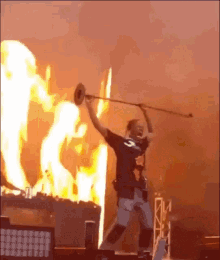

* When you try to speak or sing, the sound is generated in the **larynx** which is also used to adjust the pitch and volume. Manipulation of the larynx is used to generate a source sound with a particular fundamental frequency or pitch. This source sound is altered as it travels through the vocal tract, configured differently based on the position of the tongue, lips, mouth, and pharynx. The process of altering a source sound as it passes through the filter of the vocal tract creates the many different vowels and consonant sounds of the world's languages as well as tone.
* The sound that is generated is a vibration that propagates as an acoustic wave(compressions and rarefactions), through a transmission medium such as air.
* When sound enters through the windscreen of the microphone, the sound wave moves the diaphragm. When the diaphragm vibrates, the coil moves in the magnetic field, producing a varying current in the coil through electromagnetic induction.


For the time being let's keep the rapidly varying music and consider a simple sine wave as an input to the microphone!

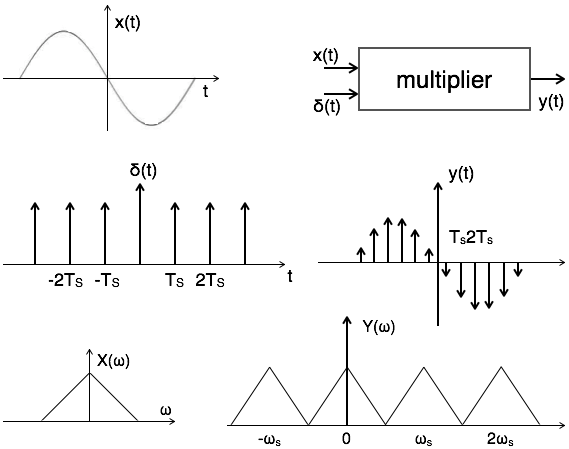

In [ ]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')

* The analog voltage produced by the microphone is continuous signal and to

In [382]:
# Input signal x(t) -> A simple sine
time = np.arange(0, 20, 0.1)
input_signal = 10 * np.sin(time) # Scaled the signal

# Impulse train δ(t)
impulse_train = signal.unit_impulse(200, [*range(0, 200, 2)])

In [383]:
# Sampling: Multiply x(t) * δ(t) = sampled signal
sampled_signal = input_signal * impulse_train

In [384]:
def quantize(val, to_values):
    """https://gist.github.com/aleju/eb75fa01a1d5d5a785cf"""
    match = None
    match_diff = None
    for other_val in to_values:
        diff = abs(other_val - val)
        if match is None or diff < match_diff:
            match = other_val
            match_diff = diff
    return match


quantized_signal = [quantize(x, [*range(-5, 5)]) for x in sampled_signal]

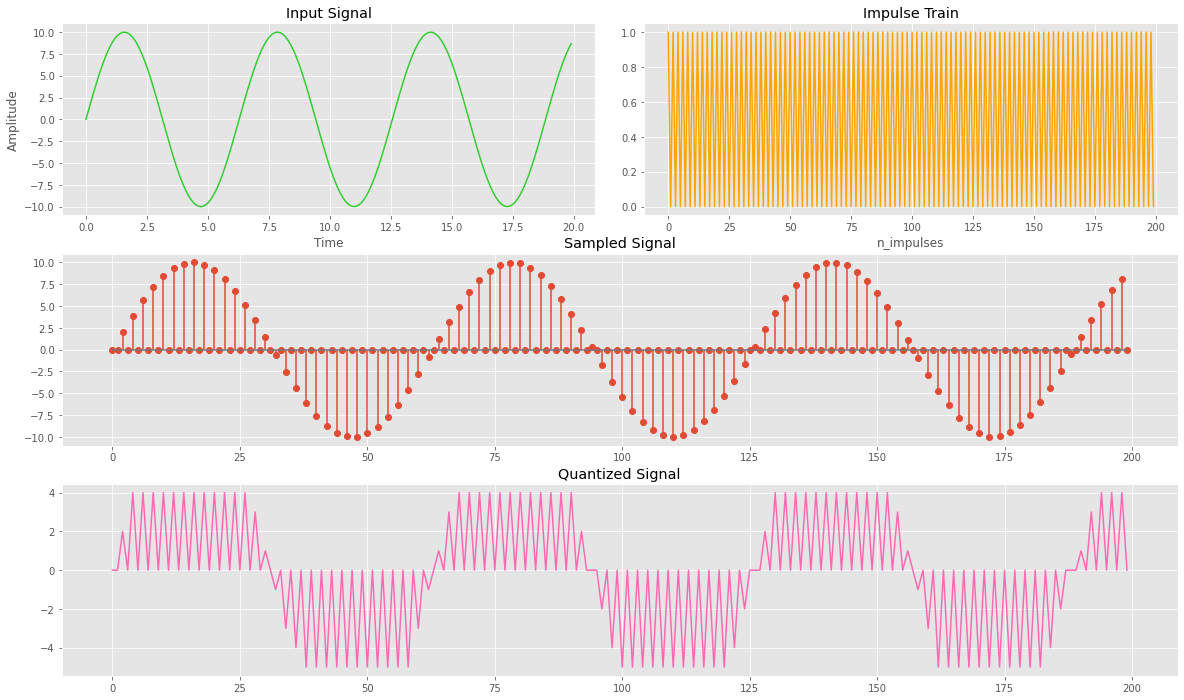

In [385]:
grid = gridspec.GridSpec(3, 4)
fig = plt.figure(figsize=(20, 12))
fig.clf()

ax1 = fig.add_subplot(grid[0, 0:2])
ax2 = fig.add_subplot(grid[0, 2:4])
ax3 = fig.add_subplot(grid[1, :])
ax4 = fig.add_subplot(grid[2, :])


ax1.plot(time, input_signal, color='limegreen')
ax2.plot(impulse_train, color='orange')
ax3.stem(sampled_signal)
ax4.plot(quantized_signal, color='hotpink')

ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time')
ax2.set_xlabel('n_impulses')

ax1.title.set_text('Input Signal')
ax2.title.set_text('Impulse Train')
ax3.title.set_text('Sampled Signal')
ax4.title.set_text('Quantized Signal')


plt.show()

More on Sampling: [Sampling](https://www.tutorialspoint.com/signals_and_systems/signals_sampling_theorem.htm)
[Sampling Techniques](https://www.tutorialspoint.com/signals_and_systems/signals_sampling_techniques.htm)
<br>
More on Quantization: [here](https://dspillustrations.com/pages/posts/misc/quantization-and-quantization-noise.html)


In [386]:
import math
b = 8
sample_max = (2 ** (b-1)) - 1
g = math.floor(sampled_signal*sample_max)


TypeError: only size-1 arrays can be converted to Python scalars